<a href="https://colab.research.google.com/github/Cristobalm26/Actividades_EIE401/blob/main/Actividades/Actividad_3/Actividad_3_Crist%C3%B3bal_Moraga_19841682_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Cristoóbal Antonio Moraga Acosta </h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


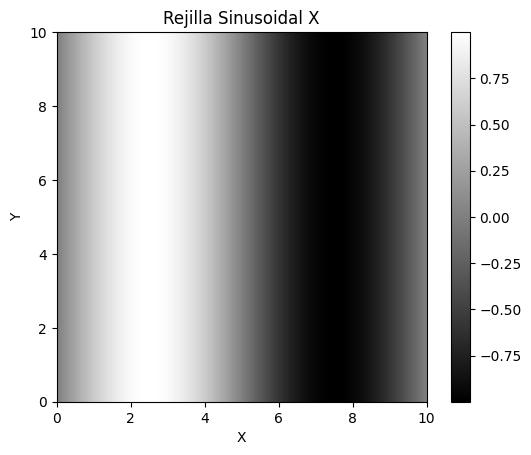

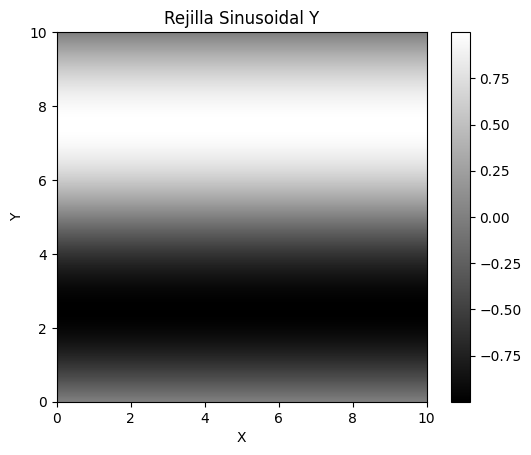

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la rejilla sinusoidal
frecuencia = 0.1
amplitud = 1.0
muestras = 500  # Resolución

# Crear una rejilla de coordenadas
x = np.linspace(0, 10, muestras)
X, Y = np.meshgrid(x, x)

# Señales sinusoidales
señal_seno_X = amplitud * np.sin(2 * np.pi * frecuencia * X)
señal_seno_Y = amplitud * np.sin(2 * np.pi * frecuencia * Y)

# Graficas
plt.imshow(señal_seno_X, cmap='gray', extent=(0, 10, 0, 10))
plt.colorbar()
plt.title('Rejilla Sinusoidal X')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.imshow(señal_seno_Y, cmap='gray', extent=(0, 10, 0, 10))
plt.colorbar()
plt.title('Rejilla Sinusoidal Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


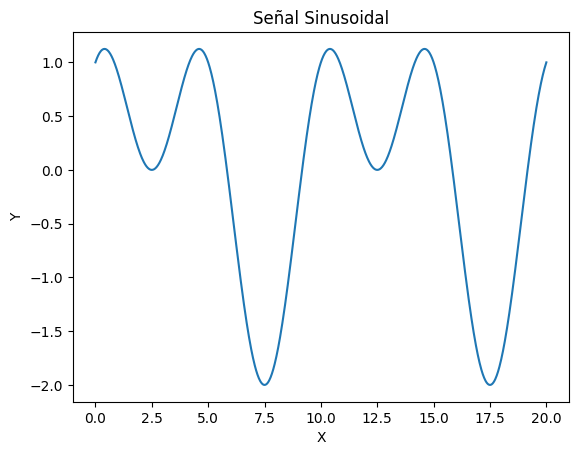

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
frecuencia = 100
amplitud = 1.0
muestras = 1000  # Resolución

# Vector
x = np.linspace(0, 20, muestras)

# Señales sinusoidales
señal_seno = amplitud * np.sin(2 * np.pi * frecuencia * x)
señal_cos = amplitud * np.cos(4 * np.pi * frecuencia * x)
señal_final = señal_seno + señal_cos

# Grafica
plt.plot(x, señal_final)
plt.title('Señal Sinusoidal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

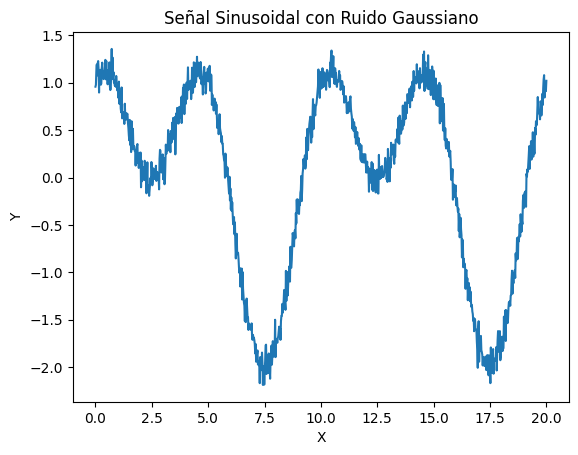

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal sinusoidal
frecuencia = 100
amplitud = 1.0
muestras = 1000  # Resolución

# Rejilla de coordenadas
x = np.linspace(0, 20, muestras)

señal_seno = amplitud * np.sin(2 * np.pi * frecuencia * x)
señal_cos = amplitud * np.cos(4 * np.pi * frecuencia * x)
señal_final = señal_seno + señal_cos

# Parámetros del ruido gaussiano
media = 0
desviacion_estandar = 0.1
ruido = np.random.normal(media, desviacion_estandar, señal_final.shape)

# Ruido gaussiano a la señal
señal_final_con_ruido = señal_final + ruido

# Grafica de la señal con ruido gaussiano
plt.plot(x, señal_final_con_ruido)
plt.title('Señal Sinusoidal con Ruido Gaussiano')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Se usa la señal creada en la 2.1 y agregarle ruido (ayudante lo dijo en la ayudantia del 05-04-2024)

## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


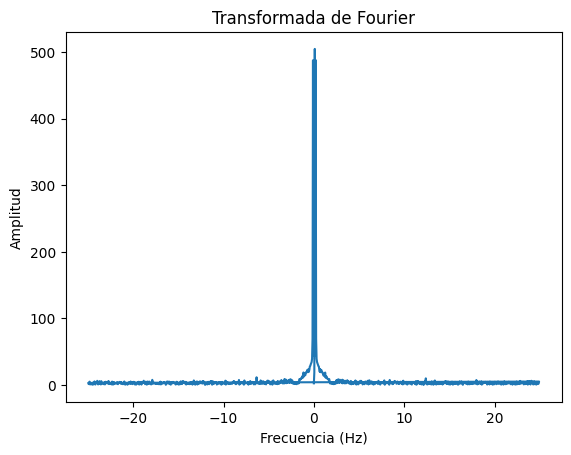

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función fft
def fft(signal):
    N = len(signal)
    if N <= 1:  # Caso base: la señal tiene longitud 1
        return signal
    elif N % 2 != 0:  # Si la longitud de la señal es impar, añadir un cero para hacerla par
        signal = np.append(signal, [0])
        N += 1
    # Se divide la señal en partes pares e impares y aplicar la recursión
    even = fft(signal[::2])  # Transformada de Fourier de la parte par de la señal
    odd = fft(signal[1::2])   # Transformada de Fourier de la parte impar de la señal
    # Calcular la transformada de Fourier combinada usando la fórmula de la FFT
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + \
           [even[k] - T[k] for k in range(N // 2)]

# Calcular la transformada de Fourier usando la FFT personalizada
transformada = fft(señal_final_con_ruido)

# Calcular la frecuencia correspondiente a cada punto de la transformada
frecuencia = np.fft.fftfreq(muestras, x[1] - x[0])

# Graficar la transformada de Fourier
plt.plot(frecuencia, np.abs(transformada))
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

Para normalizar la transformada de Fourier, se debe dividir cada elemento de la transformada por el número de muestras.

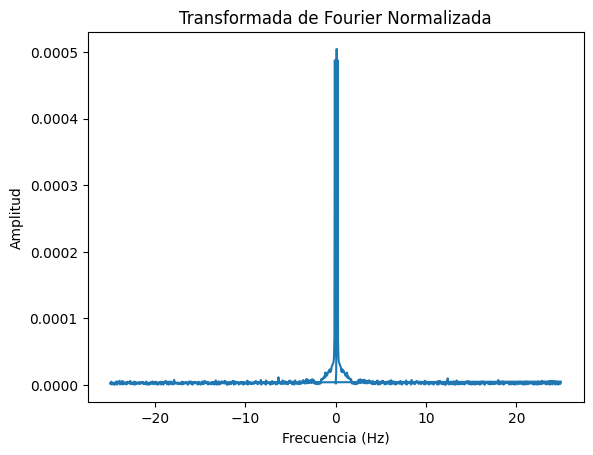

In [ ]:
# Transformada de Fourier normalizada
transformada1 = np.array(transformada) / muestras

# Frecuencia correspondiente a cada punto de la transformada
frecuencia = np.fft.fftfreq(muestras, x[1] - x[0])

# Grafica
plt.plot(frecuencia, np.abs(transformada1))
plt.title('Transformada de Fourier Normalizada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

La función np.fft.ifft en NumPy se utiliza para calcular la transformada inversa de Fourier (IFFT) de una secuencia de datos. La IFFT es el proceso inverso de la FFT, y se utiliza para convertir una señal del dominio de la frecuencia de nuevo al dominio del tiempo.


Primero se debe tener una secuencia de datos en el dominio de la frecuencia en la entrada. Esta secuencia representa los coeficientes de la transformada de Fourier de una señal en el dominio de la frecuencia.

Luego se calcula la transformada inversa de Fourier. Esta transformación involucra una serie de cálculos complejos, incluyendo operaciones de suma, resta, multiplicación y exponenciación compleja.

Finalmente se devuelve una secuencia de datos en el dominio del tiempo, que representa la señal original reconstruida a partir de su representación en el dominio de la frecuencia. Esta secuencia puede ser de números reales o complejos, dependiendo de la entrada.

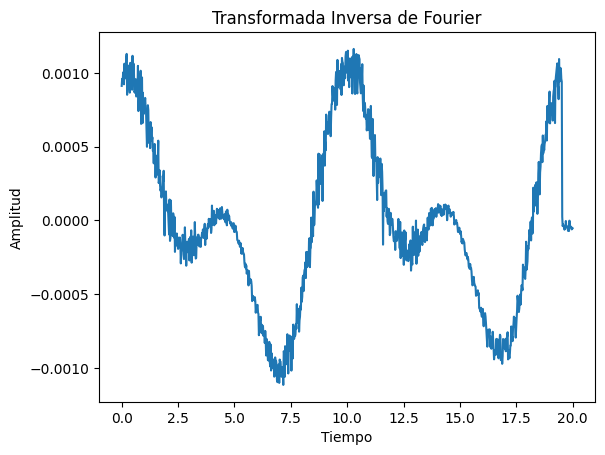

In [ ]:
señal_reconstruida = np.fft.ifft(transformada)

# Graficar la transformada inversa de Fourier
plt.plot(x, np.real(señal_reconstruida))  # Tomar solo la parte real de la señal
plt.title('Transformada Inversa de Fourier')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()


### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D

*   Elemento de lista
*   Elemento de lista

y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

DFT 2-D de la señal:
[[-4.05065573e+00+0.00000000e+00j  4.87224714e+00-1.36124217e-01j
   1.23218052e+01-4.98520294e+02j ...  4.01637210e+00-4.52520172e-01j
   1.23218052e+01+4.98520294e+02j  4.87224714e+00+1.36124217e-01j]
 [ 4.87224714e+00-1.36124217e-01j  1.23218052e+01-4.98520294e+02j
   4.01637210e+00+4.52520172e-01j ...  1.23218052e+01+4.98520294e+02j
   4.87224714e+00+1.36124217e-01j -4.05065573e+00-2.02550819e-11j]
 [ 1.23218052e+01-4.98520294e+02j  4.01637210e+00+4.52520172e-01j
   4.98286544e+02+6.30641563e+00j ...  4.87224714e+00+1.36124217e-01j
  -4.05065573e+00-2.02550819e-11j  4.87224714e+00-1.36124217e-01j]
 ...
 [ 4.01637210e+00-4.52520172e-01j  1.23218052e+01+4.98520294e+02j
   4.87224714e+00+1.36124217e-01j ...  2.34989065e-01-2.05061354e+00j
   2.03576339e+00+1.26503393e+00j  4.98286544e+02-6.30641563e+00j]
 [ 1.23218052e+01+4.98520294e+02j  4.87224714e+00+1.36124217e-01j
  -4.05065573e+00-2.02550819e-11j ...  2.03576339e+00+1.26503393e+00j
   4.98286544e+02-6.306415

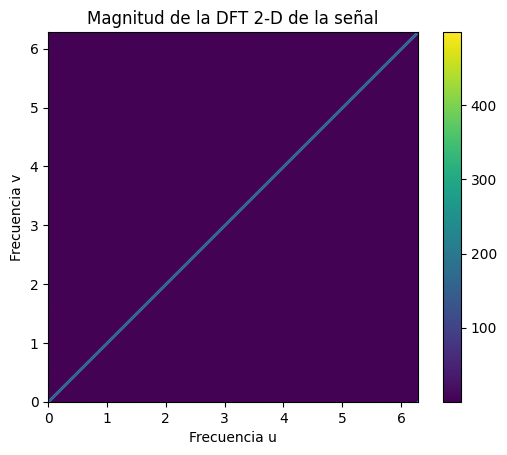

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def DFT2D(signal):
    N = len(signal)
    dft = np.zeros((N, N), dtype=np.complex128)
    for u in range(N):
        for v in range(N):
            for x in range(N):
                dft[u, v] += signal[x] * np.exp(-2j * np.pi * ((u * x) / N + (v * x) / N))
    return dft

# Parámetros de la señal sinusoidal
frecuencia = 100
amplitud = 1.0
muestras = 1000  # Resolución

# Rejilla de coordenadas
x = np.linspace(0, 20, muestras)

señal_seno = amplitud * np.sin(2 * np.pi * frecuencia * x)
señal_cos = amplitud * np.cos(4 * np.pi * frecuencia * x)
señal_final = señal_seno + señal_cos

# Parámetros del ruido gaussiano
media = 0
desviacion_estandar = 0.1
ruido = np.random.normal(media, desviacion_estandar, señal_final.shape)

# Ruido gaussiano a la señal
señal_final_con_ruido = señal_final + ruido

# Aplicar DFT 2-D a la señal
dft_signal = DFT2D(señal_final_con_ruido)

# Imprimir el resultado
print("DFT 2-D de la señal:")
print(dft_signal)

# Graficar la magnitud de la DFT
plt.imshow(np.abs(dft_signal), cmap='viridis', extent=[0, 2*np.pi, 0, 2*np.pi])
plt.colorbar()
plt.title('Magnitud de la DFT 2-D de la señal')
plt.xlabel('Frecuencia u')
plt.ylabel('Frecuencia v')
plt.show()


La presencia de una diagonal y un fondo morado en la gráfica de la magnitud de la DFT sugiere una distribución uniforme de energía en todas las frecuencias, lo cual puede ser indicativo de una señal aleatoria o de ruido. También puede señalar una fuerte correlación entre las frecuencias en diferentes dimensiones de la señal, como ocurre en el caso de una señal bidimensional.

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

El ruido en el dominio temporal provoca cambios en la amplitud de la señal en cada punto de la se serie temporal, lo que puede distorsionar la forma general de la onda y agregar fluctuaciones aleatorias, en cambio el ruido en el dominio frecuencial afecta las amplitudes de las diferentes frecuencias presentes en la señal. Esto altera la distribucion de energia en las diferentes frecuencias, por ende cambia la forma en que la señal se descompone en sus componentes de frecuencia.

Finalmente, el rudio aplicado en el dominio temporal afecta directamente los valores de la señal a lo largo del tiempo, mientras que el ruido aplicado en el dominio frecuencial modifica las amplitudes de las componenetes de frecuencia de la señal.



1.   Primer caso: Se calcula la FFT la cual proporciona información sobre las frecuencias presentes en la señal y sus amplitudes correspondientes, en donde a partir de la grafica de la magnitud de la transformada permite obtener las frecuencias que estan presentes en la señal y cuanta energia hay en cada una.
2.   Segundo Caso: Se normaliza la FFT, cuya informacion es util para comparar la distribucion de frecuencias entre diferentes señales o para garantizar que la amplitud de la transformada esté en una escala comprensible.
3. Tercer caso: Se calcula la transformada inversa de fourier cuyo resultado es la reconstruccion de la señal original a partir de su representación en el dominio de la frecuencia.
4. Cuarto caso: La DFT 2D entrega información sobre las frecuencias presentes tanto en la dimensión horizontal como en la vertical de la señal.



## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html